# Evaluation Plots and Analysis

This notebook provides visualization and analysis of retrieval evaluation results.

## Setup


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add src to path
sys.path.insert(0, os.path.join('..', 'src'))

from eval.metrics import (
    load_run_file,
    load_qrels_file,
    ndcg_at_k,
    map_at_k,
    recall_at_k,
    mrr
)
from eval.stats_tests import compare_runs
from eval.robustness_slices import load_slices

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Load Data


In [2]:
# Example: Load baseline run and qrels
# Replace with actual paths when available
baseline_run_path = '../results/baseline_runs/bm25_trec_covid.csv'
qrels_path = '../dataset/trec-covid/qrels'

# For now, use sample data
baseline_run_path = '../tests/data/sample_run.csv'
qrels_path = '../tests/data/sample_qrels.csv'

baseline_run = load_run_file(baseline_run_path)
qrels = load_qrels_file(qrels_path)

print(f"Loaded {len(baseline_run)} queries")
print(f"Loaded {len(qrels)} qrels")


Loaded 3 queries
Loaded 3 qrels


## Compute Metrics


In [3]:
# Compute baseline metrics
baseline_ndcg10 = ndcg_at_k(baseline_run, qrels, k=10)
baseline_map = map_at_k(baseline_run, qrels)
baseline_recall100 = recall_at_k(baseline_run, qrels, k=100)
baseline_mrr = mrr(baseline_run, qrels)

print("Baseline Metrics:")
print(f"  nDCG@10:  {baseline_ndcg10:.4f}")
print(f"  MAP:      {baseline_map:.4f}")
print(f"  Recall@100: {baseline_recall100:.4f}")
print(f"  MRR:      {baseline_mrr:.4f}")


Baseline Metrics:
  nDCG@10:  0.9760
  MAP:      0.9167
  Recall@100: 1.0000
  MRR:      1.0000


## Plot Metrics Comparison


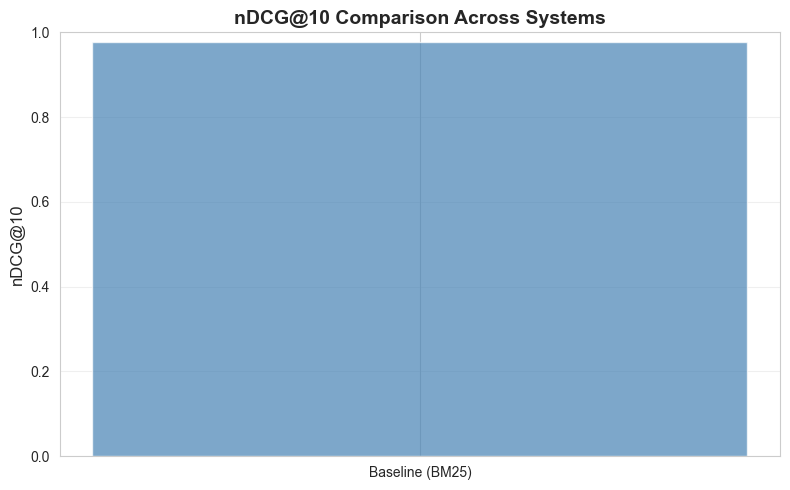

In [4]:
# Example: Compare baseline vs system (when system run is available)
# For demonstration, create placeholder data
systems = ['Baseline (BM25)']
ndcg_scores = [baseline_ndcg10]

# Plot nDCG@10 comparison
plt.figure(figsize=(8, 5))
plt.bar(systems, ndcg_scores, color='steelblue', alpha=0.7)
plt.ylabel('nDCG@10', fontsize=12)
plt.title('nDCG@10 Comparison Across Systems', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Per-Query Analysis


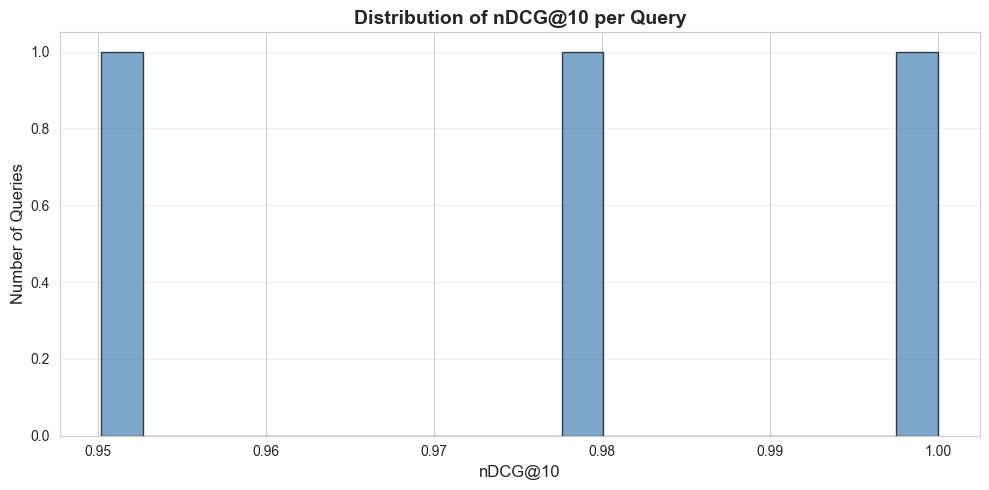

In [5]:
# Compute per-query nDCG@10
from eval.stats_tests import compute_per_query_metric

per_query_ndcg = compute_per_query_metric(baseline_run, qrels, metric='ndcg@10', k=10)

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(list(per_query_ndcg.values()), bins=20, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('nDCG@10', fontsize=12)
plt.ylabel('Number of Queries', fontsize=12)
plt.title('Distribution of nDCG@10 per Query', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Robustness Analysis: Familiar vs Unfamiliar Queries

(Will be populated once query slices are computed)


In [6]:
# Load query slices (if available)
# slices_path = '../results/slices.csv'
# slices = load_slices(slices_path)
# 
# Compute metrics per slice and plot comparison
print("Robustness analysis will be available once query slices are computed.")


Robustness analysis will be available once query slices are computed.


## Statistical Tests

(Will be populated when comparing baseline vs system runs)


In [7]:
# Compare baseline vs system (when available)
# results = compare_runs(
#     baseline_run_path,
#     system_run_path,
#     qrels_path,
#     metric='ndcg@10',
#     k=10
# )
# 
# print("Statistical Comparison:")
# print(f"  Baseline Mean: {results['baseline_mean']:.4f}")
# print(f"  System Mean:   {results['system_mean']:.4f}")
# print(f"  Difference:    {results['mean_difference']:.4f}")
# print(f"  p-value:       {results['p_value']:.4f}")
# print(f"  95% CI:         [{results['ci_lower']:.4f}, {results['ci_upper']:.4f}]")
